In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset .csv')

In [80]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [36]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [37]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [38]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# COnversion of dataset


- Converting average cost for two in inr

In [107]:
exchange_rates = {
    "Botswana Pula(P)": 6.11,
    "Dollar($)": 84.37,
    "Pounds(£)": 106.93,
    "Euro(€)": 91.11,
    "Yuan(¥)": 11.82,
    "Australian Dollar(A$)": 54.32,
    "Canadian Dollar(C$)": 60.58,
    "Japanese Yen(¥)": 0.54
}
df['Average Cost in INR'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates.get(row['Currency'], 1) if pd.notnull(row['Average Cost for two']) else None,axis=1
)
df[['Average Cost for two', 'Currency', 'Average Cost in INR']].head()


,Average Cost for two,Currency,Average Cost in INR
0,1100,Botswana Pula(P),6721.0
1,1200,Botswana Pula(P),7332.0
2,4000,Botswana Pula(P),24440.0
3,1500,Botswana Pula(P),9165.0
4,1500,Botswana Pula(P),9165.0


In [44]:
df.nunique()

,0
Restaurant ID,9551
Restaurant Name,7446
Country Code,15
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677
Cuisines,1825


- converting the necessary column using label encoder

- dropping the unnecessary columns from the dataset

In [53]:
df.head()

,Longitude,Latitude,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost in INR,Has Table
0,121.027535,14.565443,0,0,3,4.8,0,1,314,6721.0,1
1,121.014101,14.553708,0,0,3,4.5,0,1,591,7332.0,1
2,121.056831,14.581404,0,0,4,4.4,1,5,270,24440.0,1
3,121.056475,14.585318,0,0,4,4.9,0,1,365,9165.0,0
4,121.057508,14.584450,0,0,4,4.8,0,1,229,9165.0,1


In [54]:
df.describe()

,Longitude,Latitude,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Average Cost in INR,Has Table
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,1350.698781,0.121244
std,41.467058,11.007935,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,16150.426063,0.326428
min,-157.948486,-41.330428,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.081343,28.478713,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,300.000000,0.000000
50%,77.191964,28.570469,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,500.000000,0.000000
75%,77.282006,28.642758,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,800.000000,0.000000
max,174.832089,55.976980,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,800000.000000,1.000000


In [55]:
df.columns

Index(['Longitude', 'Latitude', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR', 'Has Table'],
      dtype='object')

# Calculating the statistical measures

In [56]:
df[['Longitude', 'Latitude', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR', 'Has Table']].mean()

,0
Longitude,64.126574
Latitude,25.854381
Has Online delivery,0.256622
Is delivering now,0.003560
Price range,1.804837
Aggregate rating,2.666370
Rating color,2.952885
Rating text,1.788713
Votes,156.909748
Average Cost in INR,1350.698781


In [57]:
df[['Longitude', 'Latitude', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR', 'Has Table']].median()

,0
Longitude,77.191964
Latitude,28.570469
Has Online delivery,0.000000
Is delivering now,0.000000
Price range,2.000000
Aggregate rating,3.200000
Rating color,2.000000
Rating text,2.000000
Votes,31.000000
Average Cost in INR,500.000000


In [58]:
df[['Longitude', 'Latitude', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR', 'Has Table']].std()

,0
Longitude,41.467058
Latitude,11.007935
Has Online delivery,0.436792
Is delivering now,0.059561
Price range,0.905609
Aggregate rating,1.516378
Rating color,1.493048
Rating text,1.694637
Votes,430.169145
Average Cost in INR,16150.426063


In [59]:
df[['Longitude', 'Latitude', 'Has Online delivery', 'Is delivering now',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR', 'Has Table']].var()

,0
Longitude,1.719517e+03
Latitude,1.211746e+02
Has Online delivery,1.907873e-01
Is delivering now,3.547536e-03
Price range,8.201274e-01
Aggregate rating,2.299401e+00
Rating color,2.229194e+00
Rating text,2.871793e+00
Votes,1.850455e+05
Average Cost in INR,2.608363e+08


- identifying top cuisines and cities


# Task 2 descriptive analysis

In [65]:
top_cuisines = df['Cuisines'].value_counts().head(10)
print(top_cuisines)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [66]:
top_cities = df['City'].value_counts().head(10)
print(top_cities)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


# task 3 - geospatial analysis

In [71]:
import folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(restaurant_map)
restaurant_map.save("restaurant_map.html")

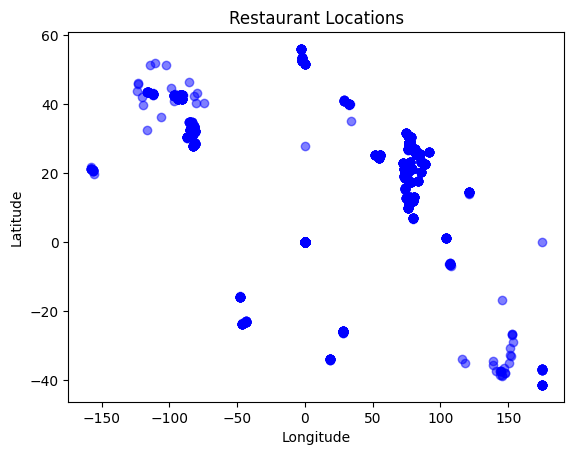

In [72]:
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue')
plt.title('Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **Level 2**

# task 1 -

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [74]:
total_restaurants = len(df)
print('total restaurants : ', total_restaurants)

total restaurants :  9551


In [82]:
table_booking_percent = df[df['Has Table booking'] == 'Yes']['Has Table booking'].count()/total_restaurants * 100
table_booking_percent

12.124384881164275

In [85]:
online_delivery_percent = df[df['Has Online delivery'] == 'Yes']['Has Online delivery'].count()/total_restaurants * 100
online_delivery_percent

25.662234321013504

- ratings

In [86]:
avg_rating_with_table = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_with_table

3.4419689119170984

In [87]:
avg_rating_without_table = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()
avg_rating_without_table

2.559358989634219

# task 2 - price range

In [91]:
price_range_counts = df['Price range'].value_counts()
most_common_price_range = price_range_counts.idxmax()
print("Most Common Price Range:", most_common_price_range)
print(price_range_counts)

Most Common Price Range: 1
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


In [94]:
average_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
highest_rating_price_range = average_rating_by_price.idxmax()
highest_average_rating = average_rating_by_price.max()
rating_color = df.loc[df['Price range'] == highest_rating_price_range, 'Rating color'].mode().iloc[0]
print("Average Rating by Price Range:\n", average_rating_by_price)
print("Price Range with Highest Average Rating:", highest_rating_price_range)
print("Highest Average Rating:", highest_average_rating)
print("Color Representing Highest Average Rating:", rating_color)

Average Rating by Price Range:
 Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64
Price Range with Highest Average Rating: 4
Highest Average Rating: 3.8179180887372017
Color Representing Highest Average Rating: Yellow


# task 3 - length of words

In [100]:
df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
df['Address Length'] = df['Address'].str.len()
df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head()


,Restaurant Name,Restaurant Name Length,Address,Address Length
0,Le Petit Souffle,16,"Third Floor, Century City Mall, Kalayaan Avenu...",71
1,Izakaya Kikufuji,16,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...",67
2,Heat - Edsa Shangri-La,22,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...",56
3,Ooma,4,"Third Floor, Mega Fashion Hall, SM Megamall, O...",70
4,Sambo Kojin,11,"Third Floor, Mega Atrium, SM Megamall, Ortigas...",64


- creating new features for table has booking and has online delivery  

In [124]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset .csv')

In [125]:
from sklearn.preprocessing import LabelEncoder
lable_encoder = LabelEncoder()

In [126]:
df['Has Table booking'] = lable_encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = lable_encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = lable_encoder.fit_transform(df['Is delivering now'])
df['Rating color'] = lable_encoder.fit_transform(df['Rating color'])
df['Rating text'] = lable_encoder.fit_transform(df['Rating text'])

# task 3 = applying ml algorithm

In [127]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [128]:
exchange_rates = {
    "Botswana Pula(P)": 6.11,
    "Dollar($)": 84.37,
    "Pounds(£)": 106.93,
    "Euro(€)": 91.11,
    "Yuan(¥)": 11.82,
    "Australian Dollar(A$)": 54.32,
    "Canadian Dollar(C$)": 60.58,
    "Japanese Yen(¥)": 0.54
}
df['Average Cost in INR'] = df.apply(lambda row: row['Average Cost for two'] * exchange_rates.get(row['Currency'], 1) if pd.notnull(row['Average Cost for two']) else None,axis=1
)
df[['Average Cost for two', 'Currency', 'Average Cost in INR']].head()

,Average Cost for two,Currency,Average Cost in INR
0,1100,Botswana Pula(P),6721.0
1,1200,Botswana Pula(P),7332.0
2,4000,Botswana Pula(P),24440.0
3,1500,Botswana Pula(P),9165.0
4,1500,Botswana Pula(P),9165.0


In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = df[['Longitude', 'Latitude','Has Online delivery', 'Is delivering now',
       'Price range', 'Rating color', 'Rating text',
       'Votes', 'Average Cost in INR']]
y = df['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [132]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [133]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [135]:
y_pred = rfr.predict(X_test)

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9863332012112702

# applying second algo to compare

In [137]:
import xgboost as xgb

In [138]:
xgb_model = xgb.XGBRegressor()

In [139]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
xgb_pred = xgb_model.predict(X_test)

In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, xgb_pred)

0.9862748113773627